2. Classify CIFAR-10 data set using MLP classifier. Perform the following

In [1]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical 

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


In [3]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


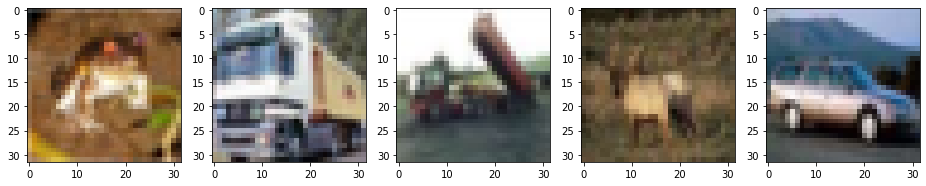

In [4]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [5]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [7]:
# Training the MLP

history = model.fit(X_train,y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

2022-01-22 07:41:10.581792: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.8316 - accuracy: 0.3369 - val_loss: 1.7672 - val_accuracy: 0.3539
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.6699 - accuracy: 0.3975 - val_loss: 1.6658 - val_accuracy: 0.4068
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5975 - accuracy: 0.4266 - val_loss: 1.6368 - val_accuracy: 0.4198
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5490 - accuracy: 0.4453 - val_loss: 1.5834 - val_accuracy: 0.4350
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5200 - accuracy: 0.4539 - val_loss: 1.5712 - val_accuracy: 0.4349
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4865 - accuracy: 0.4664 - val_loss: 1.5789 - val_accuracy: 0.4456
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4663 - accuracy: 0.4741 - val_loss: 1.5119 - val_accuracy:

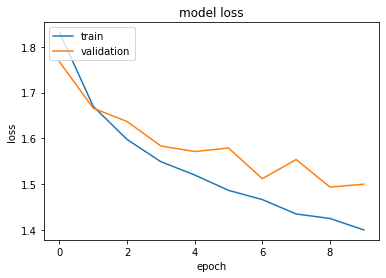

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [9]:
# Evaluating the MLP
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [10]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.4722670316696167, 0.4756999909877777]
